# Chapter 9 - Unsupervised Learning

In [1]:
import pandas as pd 
import numpy as np

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs()

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
X.shape

(100, 2)

In [9]:
X[0]

array([-6.31847432, -4.46989564])

In [10]:
X[:,0]

array([-6.31847432, -5.83910255, -8.2266143 ,  9.24045663,  9.6306031 ,
       -3.58305315, -7.95501032, -7.28829889, -9.27841382, -8.783767  ,
       -8.01183206, -5.95353899,  7.24240964, -7.25839204, -5.29009711,
       10.49564835, -5.44480507, -5.93277611,  8.95481472, -8.01700046,
        8.06726646, -7.66214699, -5.41642859, -5.92800623,  9.85985735,
        8.56243795, 10.22059916, -5.51623273, -7.49042743, -8.9831046 ,
        8.65460078, -9.07700645, -9.45476425, -7.30192178, -7.44589561,
        9.66955063, 10.16964009, -8.1655591 ,  9.82510017, -9.5385323 ,
       -3.832906  ,  9.05945099, -6.49520285, -6.32615904, 11.0519784 ,
       -5.29586882,  8.45604701, -9.22500721, -8.76863609,  9.75345721,
        9.43704503, -4.11665891, -6.22120397, -8.77640615, 10.81422331,
       -8.43868807,  9.10093025, 10.53830712,  8.54196835,  9.14788044,
        9.27864473, -5.7128106 , -5.70555841, -7.71360916, -8.89563617,
       -7.87892789, 10.2798267 , -3.93717647, -8.46582543, -7.78

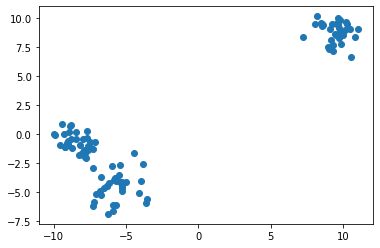

In [11]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.show()

OK... acá veo claramente los blobs

In [16]:
# Clustering

from sklearn.cluster import KMeans
k=3
k_means = KMeans(n_clusters=k)
y_pred = k_means.fit_predict(X)

In [17]:
y_pred

array([0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2,
       0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0,
       1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2,
       1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 2,
       2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0], dtype=int32)

In [18]:
y

array([2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0,
       2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2,
       1, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0,
       1, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0,
       0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2])

Notar que los separó perfectamente

In [19]:
k_means.cluster_centers_

array([[-5.68529026, -4.51281943],
       [ 9.44937519,  8.84813669],
       [-8.42784008, -0.7026129 ]])

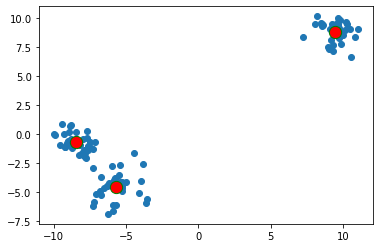

In [26]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c="r", edgecolors="g", s=150)
plt.show()

Ahí se ven claramente los centroides de los 3 blobs

Con nuevas instancias, va a calcular a qué centroide se encuentra más próximo y va a predecir que la nueva instancia pertenece a ese cluster

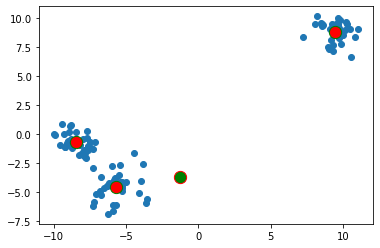

In [58]:
new_random_instance = (np.random.rand(2) - 0.5) * 10
new_random_instance

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c="r", edgecolors="g", s=150)
plt.scatter(*new_random_instance, c="g", edgecolors="r", s=150)
plt.show()

In [61]:
print(new_random_instance)

[-1.23993218 -3.67306786]


In [59]:
k_means.predict(new_random_instance.reshape(1, -1))

array([0], dtype=int32)

Se ve que pertence al cluster 0. (que tiene coordenadas [-5.68529026, -4.51281943])

In [60]:
list(map(lambda x: np.linalg.norm(x - new_random_instance), k_means.cluster_centers_))

[4.523979570365403, 16.463348850807268, 7.777507484581425]

Se ve que tiene menor distancia al centroide del cluster 0

In [64]:
# Otra forma de obtener las distancias a los centroides
k_means.transform(new_random_instance.reshape(1, -1))

array([[ 4.52397957, 16.46334885,  7.77750748]])

## Eligiendo el número correcto de clusters

In [66]:
inertias = []

for k in range(2, 8):
    kmc = KMeans(n_clusters=k)
    kmc.fit(X)
    inertias.append(kmc.inertia_)
    

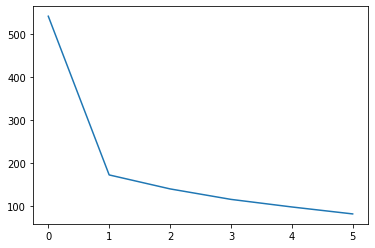

In [67]:
plt.figure()
plt.plot(inertias)
plt.show()

En este caso, en 3 clusters se ve el cambio de pendiente en la inertia! Entonces, 3 parece ser un buen número de clusters para elegir
(0 es 2, 1 es 3, 2 es 4, etc.)

### Otra forma (mejor, más fina) de medirlo, sería con el silhouette score

In [68]:
from sklearn.metrics import silhouette_score

silhouette_score(X, k_means.labels_)

0.7314412310135069

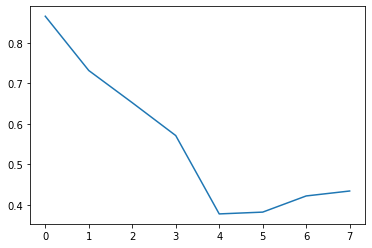

In [70]:
# Hago lo mismo que para el silhouette score
s_scores = []

for k in range(2, 10):
    kmc = KMeans(n_clusters=k)
    kmc.fit(X)
    s_scores.append(silhouette_score(X, kmc.labels_))
    
plt.figure()
plt.plot(s_scores)
plt.show()

The higher, the better. Pero acá parece decirme que 2 es un mejor n_clusters que 3